# Transfer Learning with ResNet50 for image classification


## Introduction

For this purpose, a **Residual Neural Network** is used: **ResNet**. The task is to transfer the learning from a **ResNet50**, trained with **Imagenet** dataset, to a model that classifies waste images. 


## Transfer Learning

For both humans and machines, learning something new takes time and practice. However, it is easier to perform similar tasks to those already learned.
As with humans, AI will be able to identify patterns from previous knowledge and apply them to new learning.

If a model is trained on a database, there is no need to re-train the model from scratch to fit a new set of similar data. 

Main advantages of **Transfer Learning**:
- saving resources 
- improving efficiency 
- model training facilitation
- saving time


## Dataset


To classify waste images, the **Garbage Classification** dataset will be used. It is available on https://www.kaggle.com/datasets/mostafaabla/garbage-classification/data
The dataset contains 5 types of flowers: 

1. battery
2. bio logical
3. brown glass
4. clothes
5. green glass
6. metal
7. paper
8. plastic
9. shoes
10. trash
11. White glass
12. cardboard


## Code

### Step 1 - Libraries installation and import

In [1]:
!pip freeze

absl-py==2.1.0
anyio==4.2.0
appnope==0.1.3
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
astunparse==1.6.3
async-lru==2.0.4
attrs==23.2.0
Babel==2.14.0
beautifulsoup4==4.12.3
bleach==6.1.0
cachetools==5.3.2
certifi==2023.11.17
cffi==1.16.0
charset-normalizer==3.3.2
comm==0.2.1
contourpy==1.2.0
cycler==0.12.1
debugpy==1.8.0
decorator==5.1.1
defusedxml==0.7.1
exceptiongroup==1.2.0
executing==2.0.1
fastjsonschema==2.19.1
flatbuffers==23.5.26
fonttools==4.47.2
fqdn==1.5.1
gast==0.5.4
google-auth==2.26.2
google-auth-oauthlib==1.2.0
google-pasta==0.2.0
grpcio==1.60.0
h5py==3.10.0
idna==3.6
importlib-metadata==7.0.1
importlib-resources==6.1.1
ipykernel==6.29.0
ipython==8.18.1
ipywidgets==8.1.1
isoduration==20.11.0
jedi==0.19.1
Jinja2==3.1.3
json5==0.9.14
jsonpointer==2.4
jsonschema==4.21.1
jsonschema-specifications==2023.12.1
jupyter==1.0.0
jupyter-console==6.6.3
jupyter-events==0.9.0
jupyter-lsp==2.2.2
jupyter_client==8.6.0
jupyter_core==5.7.1
jupyter_server=

In [2]:
!pip install split-folders

In [3]:
import tensorflow as tf
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
!pip install split-folders

In [5]:
# Basic libararies
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img


### Step 2 - Data preprocessing

#### 1. Visualize dataset images


In [6]:
ls ./garbage_classification/

battery/     cardboard/   green-glass/ plastic/     white-glass/
biological/  clothes/     metal/       shoes/
brown-glass/ data-split/  paper/       trash/


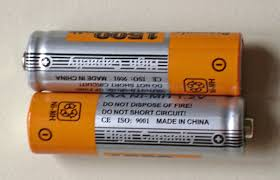

In [7]:
# battery
img_battery = image.load_img("./garbage_classification/battery/battery1.jpg")
img_battery

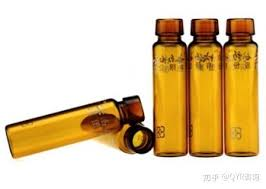

In [8]:
# brown-glass
img_brown_glass = image.load_img("./garbage_classification/brown-glass/brown-glass1.jpg")
img_brown_glass

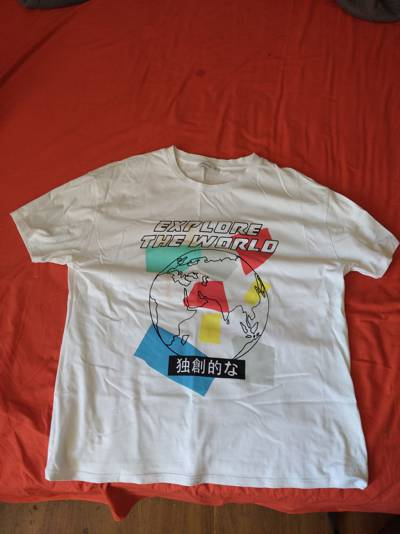

In [9]:
# clothes
img_clothes = image.load_img("./garbage_classification/clothes/clothes1.jpg")
img_clothes

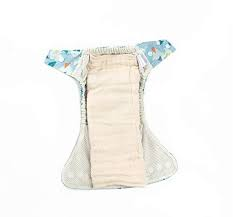

In [10]:
# trash
img_trash = image.load_img("./garbage_classification/trash/trash2.jpg")
img_trash

## 2. Split data

In [11]:
# split data in a new folder named data-split
#splitfolders.ratio("./garbage_classification", output="./garbage_classification/data-split", seed=1337, ratio=(0.7, 0.2, 0.1), group_prefix=None, move=False)

## 3. Create Keras data generators

In [12]:
datagen = ImageDataGenerator()

In [13]:
# define classes name
class_names = [ "battery",
                "bio logical",
                "brown glass",
                "clothes",
                "green glass",
                "metal",
                "paper",
                "plastic",
                "shoes",
                "trash",
                "White glass",
                "cardboard"]
class_names

['battery',
 'bio logical',
 'brown glass',
 'clothes',
 'green glass',
 'metal',
 'paper',
 'plastic',
 'shoes',
 'trash',
 'White glass',
 'cardboard']

In [14]:
# training data
train_generator = datagen.flow_from_directory( 
    directory="./garbage_classification/data-split/train/", 
    classes = class_names,
    target_size=(224, 224),  
    batch_size=32, 
    class_mode="binary", 
)

Found 8759 images belonging to 12 classes.


In [15]:
# validation data
valid_generator = datagen.flow_from_directory( 
    directory="./garbage_classification/data-split/val/", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="binary", 
)

Found 2502 images belonging to 12 classes.


In [16]:
# test data
test_generator = datagen.flow_from_directory( 
    directory="./garbage_classification/data-split/test/", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="binary", 
)

Found 1258 images belonging to 12 classes.


### Step 3 - Build the model

The first step is to build the model, using **ResNet50**.

In [17]:
# Neural network layers
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import resnet
from tensorflow.keras.applications.resnet50 import preprocess_input

In [18]:
# ResNet50 model
resnet_50 = resnet.ResNet50(weights=None,include_top=False, input_shape=(224,224,3))

# Load weights from the local file
resnet_50.load_weights("./resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5")

for layer in resnet_50.layers:
    layer.trainable = False

2024-01-22 22:34:06.471236: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-01-22 22:34:06.471261: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-01-22 22:34:06.471265: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-01-22 22:34:06.471299: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-22 22:34:06.471314: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [22]:
# build the entire model
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
# x = layers.Dense(128, activation='relu')(x) 
# x = layers.Dropout(0.5)(x)
# x = layers.Dense(64, activation='relu')(x) 
# x = layers.Dropout(0.5)(x)
# x = layers.Dense(32, activation='relu')(x) 
# x = layers.Dropout(0.5)(x)
predictions = layers.Dense(12, activation='softmax')(x)
model = Model(inputs = resnet_50.input, outputs = predictions)

### Step 4 - Train the model

**Adam** optimizer is used to train the model over **10 epochs**. It is enough by using Transfer Learning.

The loss is calculated with the **sparse_categorical_crossentropy** function.

In [23]:
# define training function
from tensorflow.keras.callbacks import EarlyStopping
import scipy
def trainModel(model, epochs, optimizer,batch_size):
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size,callbacks=[early_stopping])

In [24]:
with tf.device('/GPU:0'):
    # launch the training
    model_history = trainModel(model = model, epochs = 10, optimizer = "Adam",batch_size=32)

Epoch 1/10
274/274 [==============================] - 70s 253ms/step - loss: 2.1695 - accuracy: 0.7880 - val_loss: 0.9573 - val_accuracy: 0.8917
Epoch 2/10
274/274 [==============================] - 69s 251ms/step - loss: 1.3197 - accuracy: 0.8772 - val_loss: 0.8341 - val_accuracy: 0.9013
Epoch 3/10
274/274 [==============================] - 69s 250ms/step - loss: 1.2330 - accuracy: 0.8923 - val_loss: 0.8599 - val_accuracy: 0.9109
Epoch 4/10
274/274 [==============================] - 69s 252ms/step - loss: 1.1988 - accuracy: 0.8992 - val_loss: 0.6475 - val_accuracy: 0.9345
Epoch 5/10
274/274 [==============================] - 73s 265ms/step - loss: 1.3012 - accuracy: 0.8988 - val_loss: 1.1565 - val_accuracy: 0.9157
Epoch 6/10
274/274 [==============================] - 75s 274ms/step - loss: 1.2171 - accuracy: 0.9132 - val_loss: 0.9520 - val_accuracy: 0.9209
Epoch 7/10
274/274 [==============================] - 70s 256ms/step - loss: 1.1960 - accuracy: 0.9156 - val_loss: 1.1551 - val_ac

## Comparing GPU and CPU computation speed

In [ ]:
# %%timeit -n1 -r1 
# with tf.device('/GPU:0'):
#     # launch the trainingm
#     model_history = trainModel(model = model, epochs = 1, optimizer = "Adam")

In [ ]:
# %%timeit -n1 -r1 
# with tf.device('/CPU:0'):
#     # launch the training
#     model_history = trainModel(model = model, epochs = 1, optimizer = "Adam")

## Loss curve

In [ ]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

## Accuracy curves:

In [ ]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

### Step 5 - Evaluate the model

The model is evaluated on test data.

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

### Step 6 - Test the model on a new image

In [ ]:
img = tf.keras.preprocessing.image.load_img('./garbage_classification/brown-glass/brown-glass1.jpg', target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array]) 
img

In [ ]:
# generate predictions for samples
predictions = model.predict(img_array)
print(predictions)

In [ ]:
# generate argmax for predictions
class_id = np.argmax(predictions, axis = 1)
print(class_id)

In [ ]:
### transform classes number into classes name
class_names[class_id.item()]

### Step 7 - Save and export the model

>To save your model, you should create an other Object Storage container (with write rights) and mount it in your workspace (`saved_model` in this example).

You can now save your model in a dedicated folder.

In [ ]:
# model.save('./saved_model/my_model')

In [ ]:
# my_model directory
%ls ./saved_model/

In [ ]:
# contains an assets folder, saved_model.pb, and variables folder
%ls ./saved_model/my_model

In [ ]:
# model = tf.keras.models.load_model('./saved_model/my_model/')
# model.summary()

## Saving the Model in h5 format

In [ ]:
model.save('my_model.keras')

In [ ]:
new_model = tf.keras.models.load_model('my_model.keras')

# Show the model architecture
new_model.summary()

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

## Deploying ML model as API using Fast API

## Conclusion
